<a href="https://colab.research.google.com/github/carolvieirav/MaeTechDataRepo/blob/main/Cleaning_and_Visualization_M%C3%A3eTech_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [78]:
df = pd.read_excel('/content/Mães em Tech (respostas).xlsx')

In [79]:
df.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Carimbo de data/hora,Nome,Idade,Formação Acadêmica,Qual curso é a sua formação?,Qual área da tecnologia é do seu interesse:,Você tem algum conhecimento nessa área?,Quantos filhos você tem?,Quais são as idades?,Você tem dificuldade em conciliar o trabalho com o cuidado dos filhos?,Você consegue gerenciar melhor o trabalho com a maternidade no escritório ou homeoffice?,Hoje como funciona essa dinâmica?,Quais são as suas maiores dificuldades na busca por emprego?,O que você busca nessas oportunidades?,O que você acha que facilitaria neste processo de ser contratada em uma vaga de tech?
count,19,19,19,19,19,19,19,19.000000,19,19,19,19,13,13,13
unique,19,19,6,5,17,9,2,NaN,8,2,2,19,13,10,13
top,2021-02-05 20:24:07.825000,Andreia Alexandre,26 a 30 anos,Ensino Superior Completo,Sistemas de Informação,Dados,Sim,NaN,4 a 10 anos,Sim,No homeoffice,Eu e meu marido nos dividimos. Um dia ele fica...,Conciliação,"Horário Flexível, Ambiente de trabalho saudáve...",Ser home office e auxílio creche
freq,1,1,10,7,2,4,14,NaN,7,13,16,1,1,3,1
first,2021-02-05 16:24:14.827000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-02-07 10:13:56.623000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.473684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.columns

Index(['Carimbo de data/hora', 'Nome', 'Idade', 'Formação Acadêmica ',
       'Qual curso é a sua formação? ',
       'Qual área da tecnologia é do seu interesse:',
       'Você tem algum conhecimento nessa área?', 'Quantos filhos você tem?',
       'Quais são as idades? ',
       'Você tem dificuldade em conciliar o trabalho com o cuidado dos filhos?',
       'Você consegue gerenciar melhor o trabalho com a maternidade no escritório ou homeoffice? ',
       'Hoje como funciona essa dinâmica?',
       'Quais são as suas maiores dificuldades na busca por emprego?',
       'O que você busca nessas oportunidades?',
       'O que você acha que facilitaria neste processo de ser contratada em uma vaga de tech?'],
      dtype='object')

In [27]:
df.dropna(how='all', inplace=True) # Drop rows that all values are missing 
df.rename({'Você tem algum conhecimento nessa área?': 'Conhecimento da área',
           'Qual área da tecnologia é do seu interesse:': 'Área de Interesse', 
           'Qual curso é a sua formação? ': 'Área de Formação',
           'Quantos filhos você tem?': 'Quantidade de Filhos',
           'Quais são as idades? ': 'Idade dos Filhos', 
           'Você tem dificuldade em conciliar o trabalho com o cuidado dos filhos?': 'Dificuldade de conciliar trabalho/filhos',
           'Você consegue gerenciar melhor o trabalho com a maternidade no escritório ou homeoffice? ': 'Preferência de trabalho', 
           'Hoje como funciona essa dinâmica?': 'Dinâmica casa/trbalho',
           'Quais são as suas maiores dificuldades na busca por emprego?': 'Dificuldades na busca por emprego', 
           'O que você busca nessas oportunidades?': 'Demandas Profissionais',
           'O que você acha que facilitaria neste processo de ser contratada em uma vaga de tech?': 'Possíveis Facilitadores'
           }, axis='columns', inplace=True)

In [28]:
df.columns

Index(['Carimbo de data/hora', 'Nome', 'Idade', 'Formação Acadêmica ',
       'Área de Formação', 'Área de Interesse', 'Conhecimento da área',
       'Quantidade de Filhos', 'Idade dos Filhos',
       'Dificuldade de conciliar trabalho/filhos', 'Preferência de trabalho',
       'Dinâmica casa/trbalho', 'Dificuldades na busca por emprego',
       'Demandas Profissionais', 'Possíveis Facilitadores'],
      dtype='object')

In [29]:
df['Idade']

0                   40 a 45 anos
1                   31 a 40 anos
2                   31 a 40 anos
3                   26 a 30 anos
4                   26 a 30 anos
5     26 a 30 anos, 40 a 45 anos
6                   21 a 25 anos
7                   26 a 30 anos
8                   26 a 30 anos
9                   26 a 30 anos
10                  26 a 30 anos
11                  26 a 30 anos
12            Maiores de 46 anos
13                  40 a 45 anos
14                  26 a 30 anos
15            Maiores de 46 anos
16                  26 a 30 anos
17                  26 a 30 anos
18                  40 a 45 anos
Name: Idade, dtype: object

In [30]:
#cleaning Idade column 
 
def ages(x):
    '''
    
    Find all numeric values and clean them by transforming all into int type and store then in a variable.
    Calculate the mean if the object have 2 valid numeric values.
   
    ''' 
    
    age_list = re.findall('\d+.?\d+', x.replace(',','.'))
    age_list_int = [int(float(x)) for x in age_list]
    try:
        return sum(age_list_int)/len(age_list_int)
    except: 
        return np.nan

df['Idade'] = df['Idade'].apply(lambda x: ages(str(x))) 
#apply the ages function on the Idade column
df['Idade'].unique()

array([42.5 , 35.5 , 28.  , 35.25, 23.  , 46.  ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


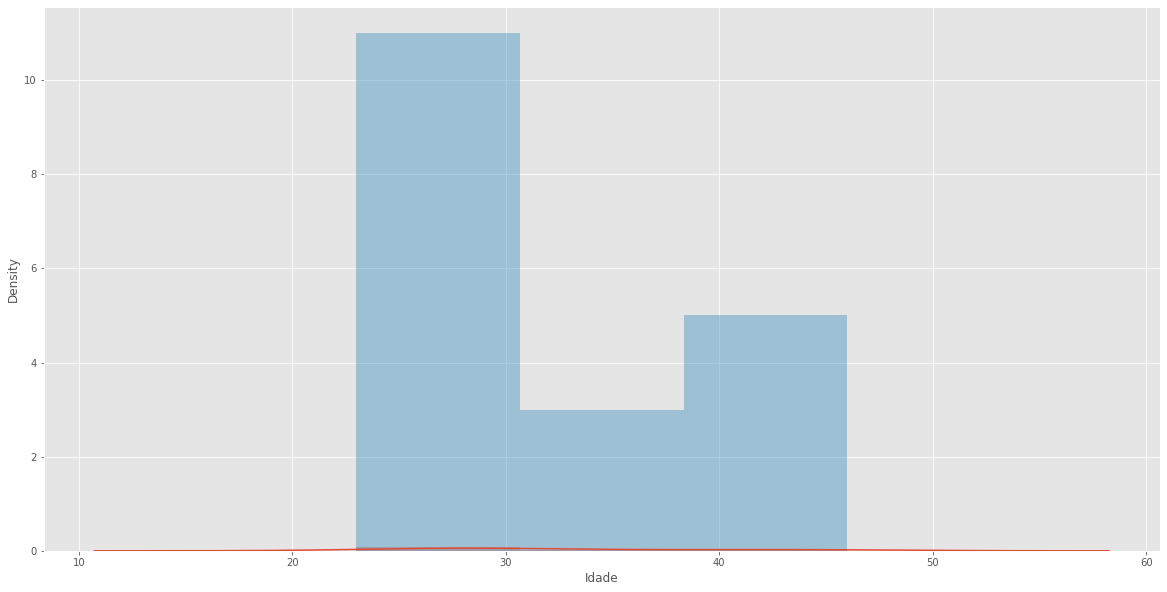

In [40]:
sns.distplot(df['Idade'])
sns.distplot(df['Idade'], kde=False)

In [74]:
len(df['Formação Acadêmica '].unique())

5

Text(0, 0.5, 'Contagem')

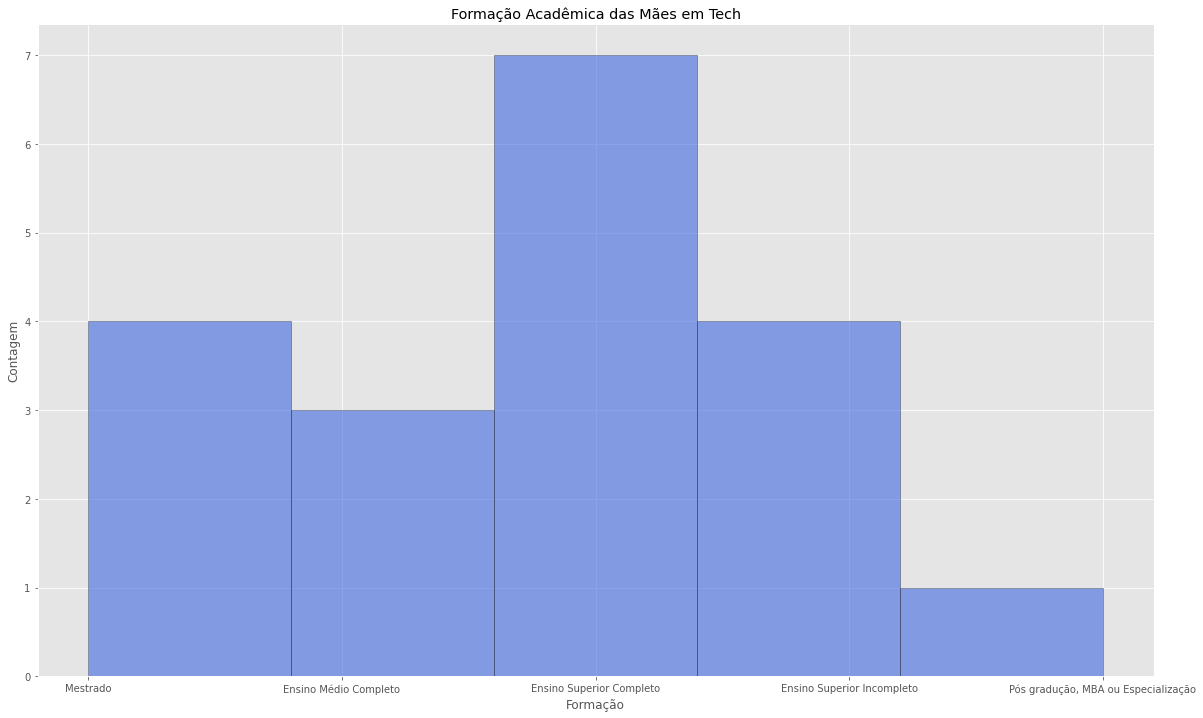

In [57]:
plt.figure(figsize = (20, 12))
df['Formação Acadêmica '].hist(bins = 5, ec = "k", alpha = .6, color = "royalblue")
plt.title("Formação Acadêmica das Mães em Tech")
plt.xlabel("Formação")
plt.ylabel("Contagem")

In [75]:
len(df['Área de Formação'].unique())

17

In [83]:
df.to_excel('Mães em Tech (respostas).xlsx')